# Object Detection Techniques In Depth

- Object detection identifies a specific object in an image or video frame.

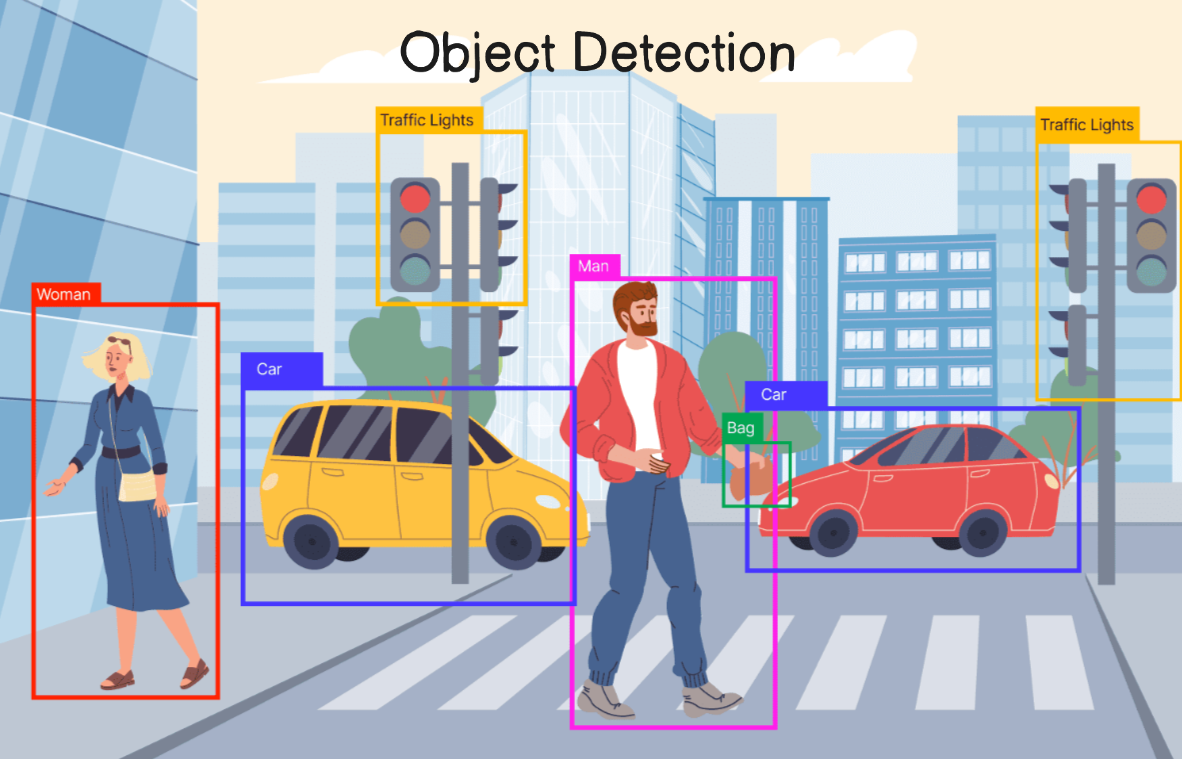

**Contents:**

- Types Of Object Detection
- Object Detection Techniques (2000s-Present)
- Key Topics: (IoU, NMS, Anchor Box)
- Most Widely Used Object Detection Algorithms: (Region Based, YOLO, SSD, RetinaNet)

### **Types of Object Detection:**

1. **Single Object Detection**:
    - Identifying and localizing a single object within an image or a frame.
2. **Multi-Object Detection**:
    - Detecting and locating multiple objects of different classes within an image or a frame.
3. **Real-Time Object Detection**:
    - Object detection systems optimized for real-time processing, often used in applications like self-driving cars, drones, and video surveillance.
4. **Instance Segmentation**:
    - In addition to detecting objects, this type also involves pixel-level segmentation of each object instance within an image.
5. **Scene Understanding**:
    - It goes beyond object detection by analyzing the relationships between objects and understanding the context of the scene.

## **Object Detection Techniques:**

- List of object detection techniques before 2000s till present time.

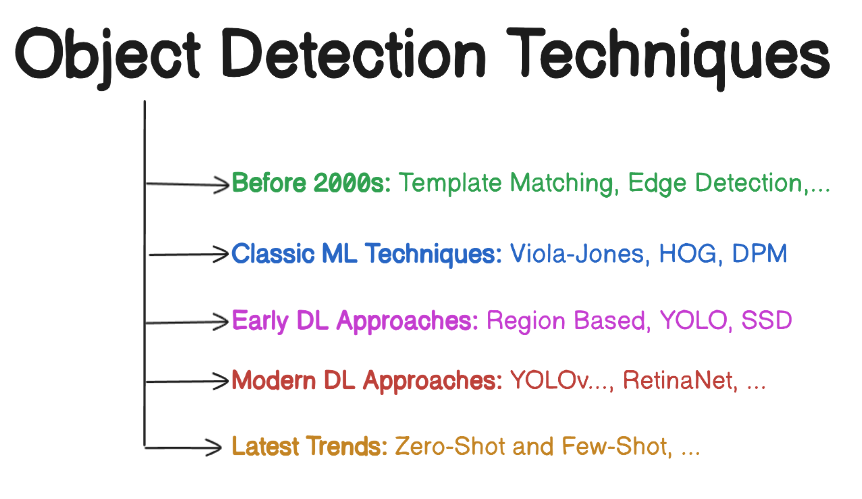

### Early Techniques (Before 2000s)

1. **Template Matching**:
    - Uses predefined templates to detect objects by matching templates with portions of the image.
    - Computationally intensive and limited to detecting objects with a fixed orientation and scale.
2. **Edge Detection**:
    - Detects objects by identifying edges within images using algorithms like Sobel, Canny, or Roberts.
    - Relies on edge features to define object boundaries.
3. **Feature-based Methods**:
    - **Scale-Invariant Feature Transform (SIFT)**: Detects and describes local features in images.
    - **Speeded-Up Robust Features (SURF)**: A faster alternative to SIFT for detecting and describing local features.

### Classic Machine Learning Techniques (2000s)

1. **Viola-Jones Object Detection Framework**:
    - Uses Haar-like features and a cascade of classifiers for real-time object detection, mainly for face detection.
2. **Histogram of Oriented Gradients (HOG)**:
    - Describes the distribution of gradients' directions and is often used in conjunction with a linear classifier like SVM.
3. **Deformable Part Models (DPM)**:
    - Represents objects as a collection of parts and models the spatial relationship between parts using HOG features.

### Early Deep Learning Approaches (2012-2015)

1. **Region-Based Convolutional Neural Networks (R-CNN)**:
    - Extracts region proposals and uses CNN to classify each region independently.
    - Introduced the idea of using CNNs for object detection, leading to significant performance improvements.
2. **Fast R-CNN**:
    - An improvement over R-CNN by sharing convolutional computations across proposals.
    - Uses RoI pooling to extract features for each proposal more efficiently.
3. **Faster R-CNN**:
    - Introduces a Region Proposal Network (RPN) to generate proposals directly within the network, further speeding up the detection process.
4. **You Only Look Once (YOLO)**:
    - Treats object detection as a single regression problem, predicting bounding boxes and class probabilities directly from the full image in one forward pass.
    - Known for its real-time detection capabilities.
5. **Single Shot MultiBox Detector (SSD)**:
    - Similar to YOLO, SSD predicts bounding boxes and class scores for multiple predefined boxes (default boxes) at different scales and aspect ratios.

### Modern Deep Learning Approaches (2016-Present)

1. **YOLOv2, YOLOv3, YOLOv4, YOLOv5, YOLOv6, YOLOv7, YOLOv8**:
    - Continuous improvements on the original YOLO with better accuracy, speed, and more advanced techniques for feature extraction and box prediction.
2. **RetinaNet**:
    - Introduces Focal Loss to address the class imbalance problem during training.
    - Combines the benefits of single-stage and two-stage detectors.
3. **Mask R-CNN**:
    - Extends Faster R-CNN by adding a branch for predicting segmentation masks, enabling instance segmentation along with object detection.
4. **EfficientDet**:
    - Uses a compound scaling method to improve efficiency and accuracy.
    - Builds on EfficientNet architecture for backbone network.
5. **Detectron2**:
    - An open-source library by Facebook AI Research with implementations of state-of-the-art detection algorithms like Faster R-CNN, Mask R-CNN, RetinaNet, etc.
6. **CenterNet**:
    - Uses keypoint estimation to find the center points of bounding boxes and regress the box size and object class.
7. **DETR (Detection Transformer)**:
    - Utilizes Transformers for end-to-end object detection, combining CNNs for feature extraction and Transformers for object detection.
8. **YOLOv4-tiny, YOLOv5s, YOLO-NAS**:
    - Variants of YOLO designed for resource-constrained environments with a focus on maintaining a balance between speed and accuracy.
9. **Vision Transformers (ViT) for Object Detection**:
    - Applies transformer models directly to sequences of image patches for object detection.

### Latest Trends (2023-Present)

1. **Zero-Shot and Few-Shot Object Detection**:
    - Methods like OpenAI's CLIP and others that leverage large-scale pretraining on diverse datasets to detect objects with minimal labeled data.
2. **Self-Supervised and Semi-Supervised Learning**:
    - Techniques that reduce dependency on large labeled datasets by learning from the data itself or with minimal supervision.
3. **Neural Architecture Search (NAS)**:
    - Automated methods to design object detection architectures that are optimized for specific tasks or hardware constraints.
4. **Multi-Modal Object Detection**:
    - Combining information from different modalities (e.g., RGB, depth, thermal) for robust object detection in diverse environments.
5. **3D Object Detection**:
    - Techniques like PointNet, PointRCNN, and PV-RCNN for detecting objects in 3D point clouds, commonly used in autonomous driving and robotics.

## Key Topics:

### **Intersection Over Union (IoU)**

- Intersection over Union (IoU) is a metric used to evaluate the accuracy of an object detection algorithm.
- It measures the overlap between the predicted bounding box and the ground truth bounding box.

$$
IoU = \frac{\text{Area of Intersection}}{\text{Area of Union}}
$$

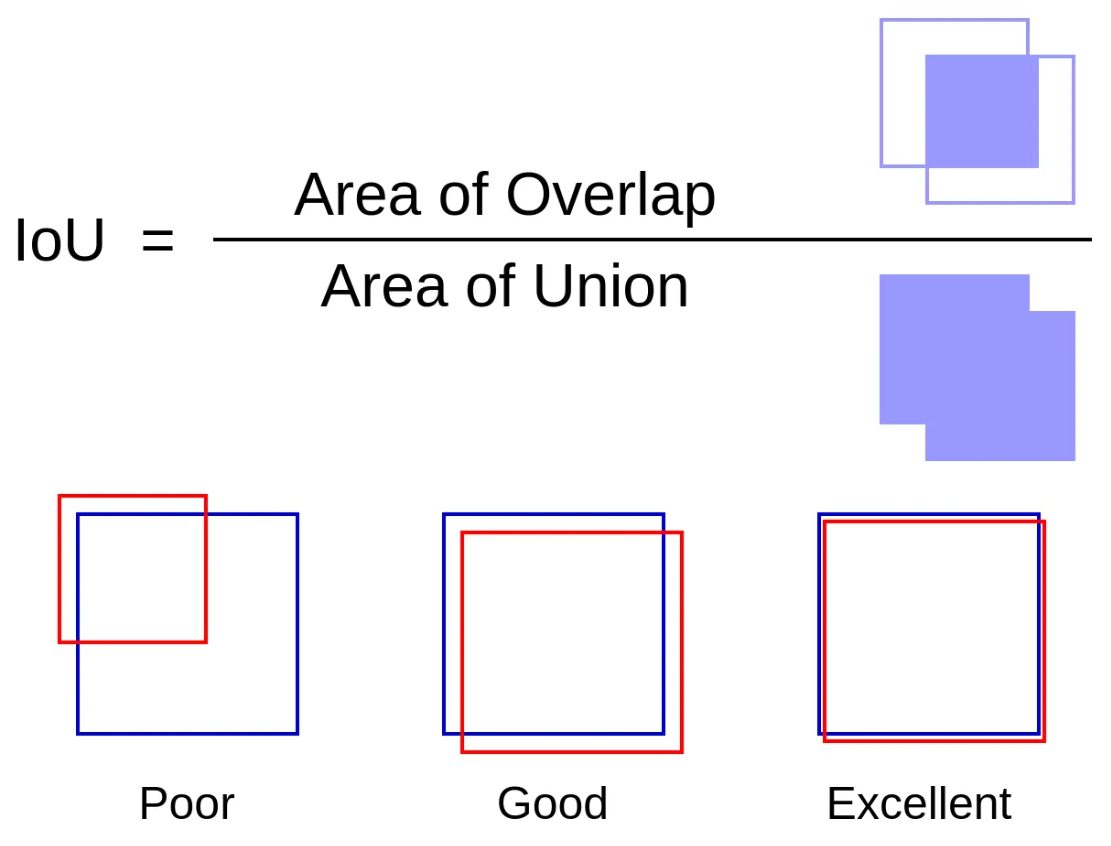

### Steps to Calculate IoU

### 1. **Determine the Coordinates of the Intersection Rectangle**:

- Calculate the coordinates of the intersection rectangle by finding the maximum of the left and top coordinates and the minimum of the right and bottom coordinates of the two bounding boxes.
- Intersection coordinates:
    
    $$
    x_{left}=max(x_{P_{left}},x_{gt_{left}})\\ y_{top}=max(y_{P_{top}},y_{gt_{top}})\\ x_{right}=min(x_{P_{right}},x_{gt_{right}})\\ y_{bottom}=min(y_{P_{bottom}},y_{gt_{bottom}})
    $$
    

### 2. **Calculate the Intersection Area**:

$$
\text{The width of the intersection rectangle: }width_{int} = x_{right} − x_{left}
\\ \text{The height of the intersection rectangle: } height_{int} = y_{bottom} − y_{top}
\\
\text{Intersection area: } Area_{int} = width_{int} × height_{int}

$$

- Ensure both width and height are non-negative (if they are negative, the intersection area is zero).

### 3. **Calculate the Union Area:**

$$
\text{Area of predicted bounding box: } Area_p = (x_{Pright} − x_{Pleft}) × (y_{Pbottom}−y_{Ptop})
\\ \text{Area of ground truth bounding box: } Area_{gt} = (x_{gt_{right}} − x_{gt_{left}}) × (y_{gt_{bottom}}−y_{gt_{top}})
\\\text{Union area: } Area_{union}=Area_p + Area_{gt} − Area_{int}

$$

### 4. **Calculate IoU**:

$$
IoU = \frac{Area_{int}}{Area_{union}}
$$

### Example Calculation

Suppose we have:

- Predicted bounding box Bp: (2, 2, 5, 5) (left, top, right, bottom)
- Ground truth bounding box Bgt: (3, 3, 6, 6)
1. **Intersection Coordinates**:
    - x_left=max⁡(2,3)=3
    - y_top=max⁡(2,3)=3
    - x_right=min⁡(5,6)=5
    - y_bottom=min⁡(5,6)=5
2. **Intersection Area**:
    - Width: 5−3=2
    - Height: 5−3=2
    - Intersection area: 2×2=4
3. **Union Area**:
    - Area of B_p: (5−2)×(5−2)=9
    - Area of B_gt: (6−3)×(6−3)=9
    - Union area: 9+9−4=14
4. **IoU**:
    - IoU = 4/14 = 0.2857

### **None Max Suppression (NMS)**

- One of the most common problems with object detection algorithms is that rather than detecting an object once just, they might detect in multiple times. For this problem we use non-max suppression to select one entity (e.g. bounding box) out of many overlapping entities.
- Non-Maximum Suppression is a post-processing algorithm applied to the set of bounding boxes output by an object detection model. It aims to eliminate multiple detections of the same object, retaining only the bounding box with the highest confidence score.

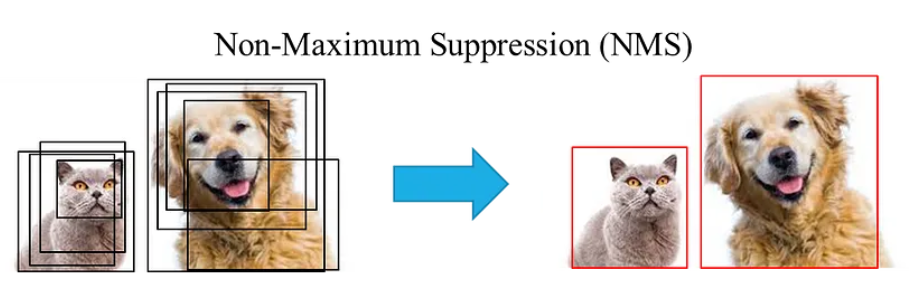

### Importance of NMS

1. **Reduces Redundancy**: Without NMS, the model might produce multiple bounding boxes for the same object, leading to redundant detections.
2. **Improves Precision**: By keeping only the most confident bounding boxes, NMS helps in improving the overall precision of the object detection model.
3. **Enhances Readability**: The final output becomes cleaner and more interpretable, showing only one bounding box per detected object.

### Variants of NMS

1. **Soft-NMS**:
    - Instead of completely suppressing boxes with high IoU, Soft-NMS decreases their confidence scores based on the IoU value, allowing more flexibility.
2. **Class-Agnostic NMS**:
    - NMS is applied across all detected objects without considering their class labels.
3. **Class-Specific NMS**:
    - NMS is applied separately for each class, ensuring that bounding boxes for different classes are not suppressed incorrectly.

### How Non-Maximum Suppression Works

Steps:

1. **Input**:
    - A set of bounding boxes with associated confidence scores.
2. **Sort Bounding Boxes**:
    - Sort all bounding boxes in descending order based on their confidence scores.
3. **Select the Highest Confidence Box**:
    - Select the bounding box with the highest confidence score and consider it as the current bounding box.
4. **Calculate IoU**:
    - Calculate the Intersection over Union (IoU) between the current bounding box and all other remaining bounding boxes.
5. **Suppress Non-Maximum Boxes**:
    - Remove all bounding boxes that have an IoU greater than a predefined threshold (e.g., 0.5) with the current bounding box.
6. **Repeat**:
    - Repeat steps 3 to 5 for the next highest confidence bounding box among the remaining boxes until all boxes have been processed.

### **Anchor Box**

- Before each grid can only identify one object, But what if there are multiple objects in a single grid?
- That leads us to the concept of anchor box.
- Anchor boxes are a set of predefined bounding boxes of a certain height and width.
- Anchor boxes are essential in algorithms like Faster R-CNN, SSD, and YOLO.

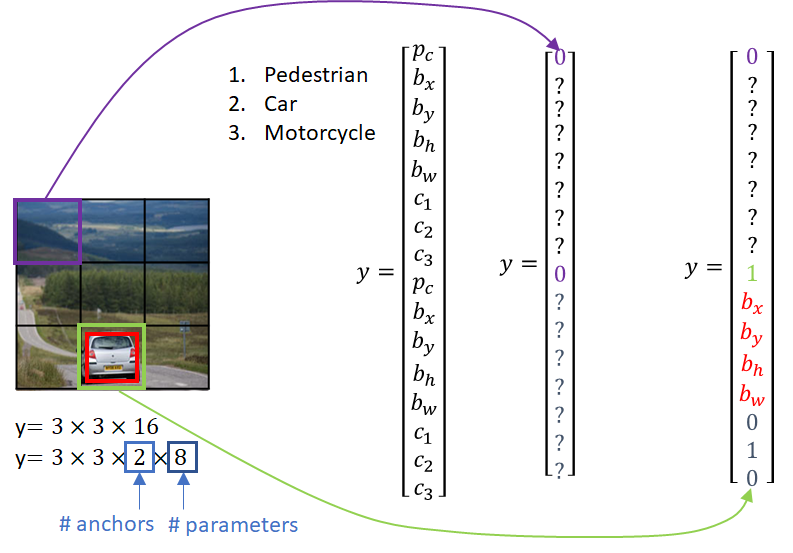

### What is an Anchor Box?

An anchor box is a template bounding box with a specific aspect ratio and size used as a reference point during the detection process. Multiple anchor boxes with different sizes and aspect ratios are typically associated with each grid cell or feature map cell in the detection network.

### How Anchor Boxes Work

1. **Initialization**:
    - Before training, a set of anchor boxes with different sizes and aspect ratios is defined. For example, you might define three anchor boxes per grid cell with aspect ratios of 1:1, 2:1, and 1:2.
    - These anchor boxes are placed at each location on the feature map or grid cell.
2. **During Training**:
    - The network outputs a set of predictions for each anchor box, including class scores and bounding box offsets (dx, dy, dw, dh).
    - The bounding box offsets adjust the position and size of the anchor box to better match the ground truth bounding box.
    - For each ground truth object, the anchor box with the highest Intersection over Union (IoU) with the ground truth box is selected as the positive sample, while others may be considered negative samples.
3. **Bounding Box Regression**:
    - The network predicts offsets for the center coordinates (tx, ty) and the dimensions (tw, th) of the anchor box.
    - The final bounding box coordinates are computed by applying these offsets to the anchor box coordinates.
4. **Loss Function**:
    - The loss function used during training typically includes a classification loss (e.g., cross-entropy loss for class prediction) and a regression loss (e.g., smooth L1 loss for bounding box offsets).
    - The classification loss ensures the correct object class is predicted, while the regression loss ensures the bounding box closely matches the ground truth.
5. **During Inference**:
    - The network outputs class probabilities and bounding box offsets for each anchor box.
    - Non-Maximum Suppression (NMS) is applied to remove redundant and overlapping boxes, keeping only the best predictions.

## Most Widely Used Object Detection Algorithms

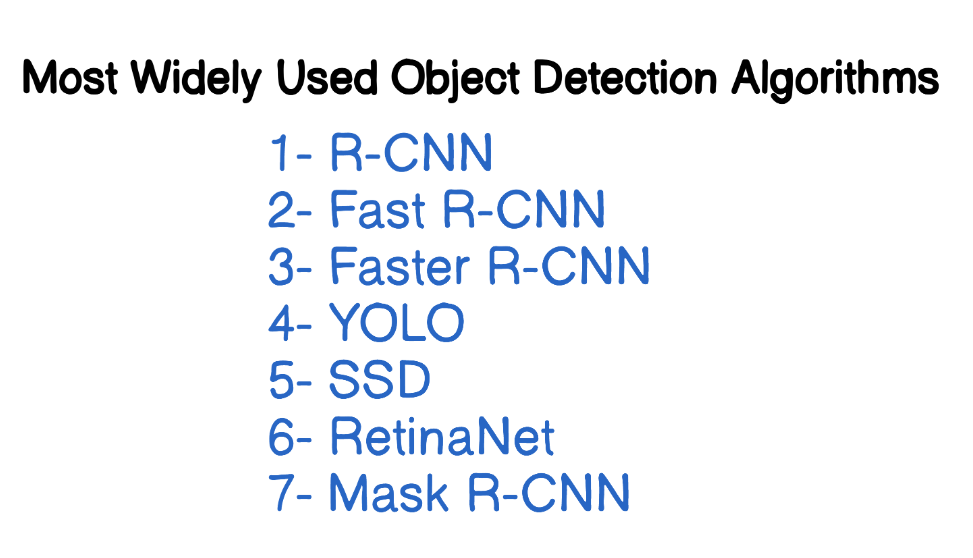

### 1. **Region-Based Convolutional Neural Networks (R-CNN)**

- R-CNN is one of the first methods in deep learning-based object detection.
- We extract 2000 regions for each image based on selective search.
- RCNN takes between 40-50 seconds to make predictions for each new image.

**Mechanism**:

- First image is taken as input.
- Then we get the region of interest (ROI) using some proposal method (for e.g. selective search)

`Note:`ROI is a portion of an image that we want to filter or operate on in some way.

`Note:` Selective search is a region proposal algorithm used in object detection. R-CNN starts by using selective search to generate a large number of region proposals.

- All these regions are then reshaped as per the input of the CNN, and each region is passed to the CNN.
- CNN extracts features for each region and SVMs are used to divide these regions into different classes.
- Finally, a bounding box regression is used to predict the bounding boxes for each identified region.

`Note:` Bounding box regression: refine or predict localization boxes in recent object detection approaches.

- **Selective Search**: R-CNN starts by using selective search to generate a large number of region proposals.
- **Feature Extraction**: Each region proposal is then resized to a fixed size and fed into a convolutional neural network (CNN) to extract features.
- **Classification and Localization**: These features are then classified using a set of SVMs, and bounding box regressors are used to refine the location of the bounding boxes.
- **Advantages**: Good accuracy.
- **Disadvantages**: Very slow due to the need to process each region proposal individually through the CNN.

### 2. **Fast R-CNN**

- Fast R-CNN improves upon R-CNN by making the process more efficient.
- The apprach is similar to RCNN algorithm, but instead of feeding the region proposal to the CNN, we feed the input image to the CNN to generate a convolutional feature map.
- Takes two second to predict image.

**Mechanism**:

- First image is taken as input.
- Features are extracted using CNN.
- Then, we generate region proposals using external algorithms, such as selective search.
- We apply the ROI pooling layer on the extracted regions of interest to make sure all the regions are of the same size.

### 1. Region-Based Convolutional Neural Networks (R-CNN)

- R-CNN is one of the first methods in deep learning-based object detection.
- We extract 2000 regions for each image based on a selective search.
- RCNN takes between 40–50 seconds to make predictions for each new image.

**Mechanism**:

- First, the image is taken as input.
- Then we get the region of interest (ROI) using some proposal method (for e.g. selective search)

`Note:`ROI is a portion of an image that we want to filter or operate on in some way.

`Note:` Selective search is a region proposal algorithm used in object detection. R-CNN starts by using selective search to generate a large number of region proposals.

- All these regions are then reshaped as per the input of the CNN, and each region is passed to the CNN.
- CNN extracts features for each region and SVMs are used to divide these regions into different classes.
- Finally, a bounding box regression is used to predict the bounding boxes for each identified region.

`Note:` Bounding box regression: refine or predict localization boxes in recent object detection approaches.

**Selective Search**: R-CNN starts by using selective search to generate a large number of region proposals.

**Feature Extraction**: Each region proposal is then resized to a fixed size and fed into a convolutional neural network (CNN) to extract features.

**Classification and Localization**: These features are then classified using a set of SVMs, and bounding box regressors are used to refine the location of the bounding boxes.

**Advantages**: Good accuracy.

**Disadvantages**: Very slow due to the need to process each region proposal individually through the CNN.

### 2. Fast R-CNN

- Fast R-CNN improves upon R-CNN by making the process more efficient.
- The approach is similar to the RCNN algorithm, but instead of feeding the region proposal to the CNN, we feed the input image to the CNN to generate a convolutional feature map.
- It takes two seconds to predict the image.

**Mechanism**:

- First, the image is taken as input.
- Features are extracted using CNN.
- Then, we generate region proposals using external algorithms, such as selective search.
- We apply the ROI pooling layer on the extracted regions of interest to make sure all the regions are of the same size.
- Finally, these regions are passed on to a fully connected network which classifies them, as well as returns the bounding boxes using softmax and linear regression layer simultaneously.

**Single Forward Pass**: Instead of running the CNN on each region proposal, Fast R-CNN runs the entire image through the CNN to produce a convolutional feature map.

**Region of Interest (RoI) Pooling**: For each region proposal, an RoI pooling layer extracts a fixed-size feature map from the convolutional feature map.

**Classification and Localization**: These pooled features are then fed into fully connected layers for classification and bounding box regression.

**Advantages**: Faster than R-CNN as it avoids redundant computations.

**Disadvantages**: Still requires a separate region proposal step.

### 3. Faster R-CNN

- Faster R-CNN introduces a Region Proposal Network (RPN) to further speed up the process.

**Mechanism**:

- Is a modified version of fast-RCNN, where it replaces selective search for generating regions of interest, with a region proposal network.

**RPN**: The RPN shares the convolutional layers with the detection network and proposes regions of interest directly.

**End-to-End Training**: The RPN and Fast R-CNN are trained together in an end-to-end fashion.

**Advantages**: Much faster and more accurate compared to R-CNN and Fast R-CNN.

**Disadvantages**: Still relatively slow for real-time applications.

### 4. You Only Look Once (YOLO)

- YOLO takes a different approach by framing object detection as a single regression problem, directly predicting bounding boxes and class probabilities from the entire image in one evaluation.

**Mechanism**:

- **Single Pass Detection**: The image is divided into a grid, and each grid cell predicts a fixed number of bounding boxes and their confidence scores along with class probabilities.
- **Unified Architecture**: A single neural network predicts bounding boxes and class probabilities simultaneously.

**Advantages**: Extremely fast, suitable for real-time applications.

**Disadvantages**: Less accurate for small objects or objects in close proximity compared to region-based methods.

Version Of YOLO: YOLO (2015), YOLO 9000 and YOLOv2 (2016), YOLOv3 (2018), YOLOv4 (2020), YOLOv5, YOLOv6, YOLOv7 (2022), YOLOv8 (2023), YOLO-NAS, YOLO-World, YOLOv9 (2024).

### 5. Single Shot Multi-Box Detector (SSD)

- SSD combines ideas from YOLO and Faster R-CNN to provide a good balance between speed and accuracy.

**Mechanism**:

- **Multiple Scale Feature Maps**: SSD uses multiple feature maps at different scales to detect objects.
- **Default Boxes**: Each feature map cell predicts a fixed set of default bounding boxes with different aspect ratios and scales.

**Advantages**: Faster than Faster R-CNN, better at handling objects of different sizes compared to YOLO.

**Disadvantages**: May struggle with very small objects or objects that are close together.

### 6. RetinaNet

- RetinaNet introduces the Focal Loss to address the issue of class imbalance during training.

**Mechanism**:

- **Feature Pyramid Network (FPN)**: Utilizes a pyramidal hierarchy of feature maps to detect objects at different scales.
- **Focal Loss**: Modifies the standard cross-entropy loss to focus on hard-to-classify examples.

**Advantages**: Better accuracy on challenging datasets with many small objects and class imbalance issues.

**Disadvantages**: Slightly more complex to train compared to YOLO and SSD.

### 7. Mask R-CNN

- Mask R-CNN extends Faster R-CNN to perform instance segmentation in addition to object detection.

**Mechanism**:

- **Segmentation Masks**: Adds a branch to the Faster R-CNN architecture that outputs a binary mask for each RoI.
- **RoIAlign**: Improves the alignment of RoI features by using bilinear interpolation.

**Advantages**: Capable of instance segmentation along with object detection.

**Disadvantages**: More computationally intensive than Faster R-CNN.


### Comparison and Use Cases

- **R-CNN, Fast R-CNN, and Faster R-CNN**: Suitable for applications where high accuracy is required, and speed is less critical.
- **YOLO and SSD**: Best for real-time applications like video surveillance, autonomous driving, and robotics.
- **RetinaNet**: Suitable for applications with class imbalance issues or where small object detection is crucial.
- **Mask R-CNN**: Ideal for applications requiring both object detection and segmentation, like medical image analysis and scene understanding.
- Finally, these regions are passed on to a fully connected network which classifies them, as well as returns the bounding boxes using softmax and linear regression layer simultaneously.

- **Single Forward Pass**: Instead of running the CNN on each region proposal, Fast R-CNN runs the entire image through the CNN to produce a convolutional feature map.
- **Region of Interest (RoI) Pooling**: For each region proposal, an RoI pooling layer extracts a fixed-size feature map from the convolutional feature map.
- **Classification and Localization**: These pooled features are then fed into fully connected layers for classification and bounding box regression.
- **Advantages**: Faster than R-CNN as it avoids redundant computations.
- **Disadvantages**: Still requires a separate region proposal step.

### 3. **Faster R-CNN**

- Faster R-CNN introduces a Region Proposal Network (RPN) to further speed up the process.

**Mechanism**:

- Is modified version of fast-RCNN, where it replace selective search for generating region of interest, with region proposal network.

- **RPN**: The RPN shares the convolutional layers with the detection network and proposes regions of interest directly.
- **End-to-End Training**: The RPN and Fast R-CNN are trained together in an end-to-end fashion.
- **Advantages**: Much faster and more accurate compared to R-CNN and Fast R-CNN.
- **Disadvantages**: Still relatively slow for real-time applications.

### 4. **You Only Look Once (YOLO)**

- YOLO takes a different approach by framing object detection as a single regression problem, directly predicting bounding boxes and class probabilities from the entire image in one evaluation.

**Mechanism**:

- **Single Pass Detection**: The image is divided into a grid, and each grid cell predicts a fixed number of bounding boxes and their confidence scores along with class probabilities.
- **Unified Architecture**: A single neural network predicts bounding boxes and class probabilities simultaneously.
- **Advantages**: Extremely fast, suitable for real-time applications.
- **Disadvantages**: Less accurate for small objects or objects in close proximity compared to region-based methods.

Version Of YOLO: YOLO (2015), YOLO 9000 and YOLOv2 (2016), YOLOv3 (2018), YOLOv4 (2020), YOLOv5, YOLOv6, YOLOv7 (2022), YOLOv8 (2023), YOLO-NAS, YOLO-World, YOLOv9 (2024).

### 5. **Single Shot Multi Box Detector (SSD)**

- SSD combines ideas from YOLO and Faster R-CNN to provide a good balance between speed and accuracy.

**Mechanism**:

- **Multiple Scale Feature Maps**: SSD uses multiple feature maps at different scales to detect objects.
- **Default Boxes**: Each feature map cell predicts a fixed set of default bounding boxes with different aspect ratios and scales.
- **Advantages**: Faster than Faster R-CNN, better at handling objects of different sizes compared to YOLO.
- **Disadvantages**: May struggle with very small objects or objects that are close together.

### 6. **RetinaNet**

- RetinaNet introduces the Focal Loss to address the issue of class imbalance during training.

**Mechanism**:

- **Feature Pyramid Network (FPN)**: Utilizes a pyramidal hierarchy of feature maps to detect objects at different scales.
- **Focal Loss**: Modifies the standard cross-entropy loss to focus on hard-to-classify examples.
- **Advantages**: Better accuracy on challenging datasets with many small objects and class imbalance issues.
- **Disadvantages**: Slightly more complex to train compared to YOLO and SSD.

### 7. **Mask R-CNN**

- Mask R-CNN extends Faster R-CNN to perform instance segmentation in addition to object detection.

**Mechanism**:

- **Segmentation Masks**: Adds a branch to the Faster R-CNN architecture that outputs a binary mask for each RoI.
- **RoIAlign**: Improves the alignment of RoI features by using bilinear interpolation.
- **Advantages**: Capable of instance segmentation along with object detection.
- **Disadvantages**: More computationally intensive than Faster R-CNN.

### Comparison and Use Cases

- **R-CNN, Fast R-CNN, and Faster R-CNN**: Suitable for applications where high accuracy is required, and speed is less critical.
- **YOLO and SSD**: Best for real-time applications like video surveillance, autonomous driving, and robotics.
- **RetinaNet**: Suitable for applications with class imbalance issues or where small object detection is crucial.
- **Mask R-CNN**: Ideal for applications requiring both object detection and segmentation, like medical image analysis and scene understanding.